In [19]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# load data
data = load_breast_cancer()

In [3]:
# check data type
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# check the shape ot 'data'
data.data.shape

(569, 30)

In [6]:
data.target.shape

(569,)

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
# split data
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)
N, D = X_train.shape

In [10]:
# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
# init model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 26ms/step - loss: 1.9283 - accuracy: 0.1959 - val_loss: 1.7279 - val_accuracy: 0.2339
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 1.7395 - accuracy: 0.2081 - val_loss: 1.5861 - val_accuracy: 0.2573
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 1.7491 - accuracy: 0.2018 - val_loss: 1.4501 - val_accuracy: 0.2749
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 1.4884 - accuracy: 0.2267 - val_loss: 1.3239 - val_accuracy: 0.2982
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 1.3997 - accuracy: 0.2912 - val_loss: 1.2037 - val_accuracy: 0.3158
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 1.1794 - accuracy: 0.3200 - val_loss: 1.0943 - val_accuracy: 0.3509
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 1.1153 - accuracy: 0.3381 - val_loss: 0.9921 - val_accuracy: 0.3918
Epoch 8/100


Epoch 59/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9578 - val_loss: 0.1698 - val_accuracy: 0.9649
Epoch 60/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1557 - accuracy: 0.9535 - val_loss: 0.1682 - val_accuracy: 0.9649
Epoch 61/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1605 - accuracy: 0.9428 - val_loss: 0.1666 - val_accuracy: 0.9649
Epoch 62/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1454 - accuracy: 0.9549 - val_loss: 0.1651 - val_accuracy: 0.9649
Epoch 63/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1350 - accuracy: 0.9675 - val_loss: 0.1636 - val_accuracy: 0.9649
Epoch 64/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.9618 - val_loss: 0.1622 - val_accuracy: 0.9649
Epoch 65/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1456 - accuracy: 0.9578 - val_loss: 0.1608 - val_accuracy: 0.9649
Epoch 

In [14]:
# Evaluate the model - evaluate() return loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 713us/step - loss: 0.1072 - accuracy: 0.9774
Train score: [0.10720168054103851, 0.9773869514465332]
6/6 [==============================] - 0s 766us/step - loss: 0.1296 - accuracy: 0.9708
Test score: [0.12964844703674316, 0.9707602262496948]


In [15]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

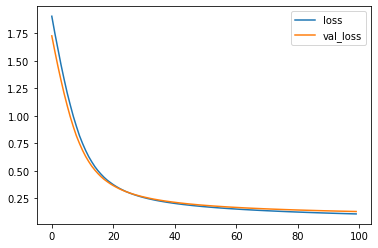

In [16]:
# plot what's returned by model.fit()
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

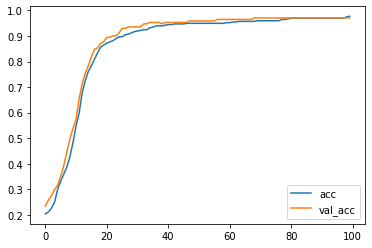

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [18]:
# make predictions
P = model.predict(X_test)

In [22]:
P = np.round(P).flatten()
print(P)

[0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 0.]


In [23]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9707602339181286
6/6 [==============================] - 0s 745us/step - loss: 0.1296 - accuracy: 0.9708
Evaluate output: [0.12964844703674316, 0.9707602262496948]


In [24]:
# saving and loading the model
model.save('model.h5')

In [25]:
!ls

 data  'Linear Clasification.ipynb'  'Linear Regression.ipynb'	 model.h5


In [27]:
model = tf.keras.models.load_model('model.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 958us/step - loss: 0.1296 - accuracy: 0.9708


[0.12964844703674316, 0.9707602262496948]